# Лабораторная работа №2 

---
**Цель работы: Изучение связи между признаками двумерного набора данных, визуализация данных.**

---

## 1. Обработка данных файла
___

**Для начала требовалось импортировать библиотеки для выполнения лабораторной работы**

In [15]:
import pandas as pd
import seaborn as sns

**pandas - для анализа данных
seaborn — это библиотека для создания статистических графиков**

**Следующим шагом стало чтение данных файла**

In [22]:
df = pd.read_csv('clients2.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0


**Перед выполнением упражнений было сочтено уместным проверить записи в файле на явные и неявные дубликаты, так как они будут мешать при составлении диаграмм, осложняя их восприятие.**

In [17]:
display(df[df.duplicated()])
display(f"duplicates quantity: {df.duplicated().sum()}") 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
792,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
793,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
794,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
795,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0


duplicates quantity: 4


**Так как выявлено 4 явных дубликата, их следует удалить, но при этом также необходимо обновить индексацию, поэтому применим метод «reset_index»** 

In [70]:
df = df.drop_duplicates().reset_index()
display(f"duplicates quantity: {df.duplicated().sum()}") 

duplicates quantity: 0


**Далее перейдём к проверке неявных дубликатов. Выводим все уникальные значения столбцов для выявления похожих значений и соответствующего их удаления. С учетом информативного содержания, интересующими столбцами являются 'Education', 'Marital_Status'.**

In [11]:
def display_implicit_duplicates():  # Выполнено в виде функции, чтобы применять несколько раз
    for col in df.columns:
        if col == 'Education' or col == 'Marital_Status':  # Выводим только информативные столбцы
            print(col, df[col].unique())

display_implicit_duplicates()

Education ['Graduation' 'PhD' 'Master' 'Basic']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'MARRIED' 'SINGL' 'Widow'
 'Alone']


**Теперь, произведём замену неявных дубликатов на соответствующие варианты. Также отобразим уникальные значения, чтобы проверить, что замена прошла корректно.**

In [24]:
df['Marital_Status'] = df['Marital_Status'].replace(
    'SINGL', 'Single'
).replace(
    'MARRIED', 'Married'
)

display_implicit_duplicates()

Education ['Graduation' 'PhD' 'Master' 'Basic']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']


**Последним шагом удалим строки с пустыми значениями, так как они тоже мешают объективному восприятию информации**

In [89]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            780 non-null    int64  
 1   index              780 non-null    int64  
 2   ID                 780 non-null    int64  
 3   Year_Birth         780 non-null    int64  
 4   Education          780 non-null    object 
 5   Marital_Status     780 non-null    object 
 6   Income             780 non-null    float64
 7   Kidhome            780 non-null    float64
 8   Dt_Customer        780 non-null    object 
 9   NumDealsPurchases  780 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 61.1+ KB


**После устранения дубликатов перейдём к выполнению упражнений.**

---
# 2. Построение графиков
---

### 2.1. Построение точечной диаграммы

**`Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными цветами).`**

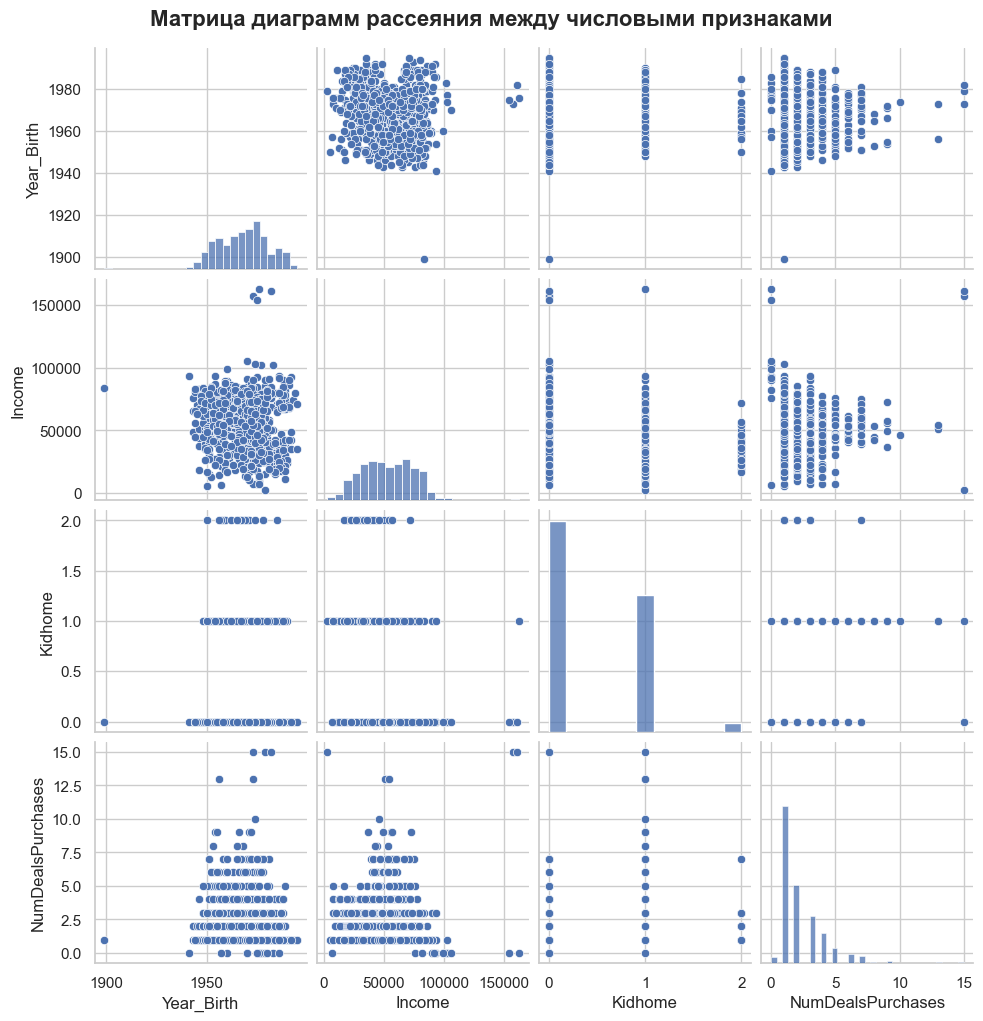

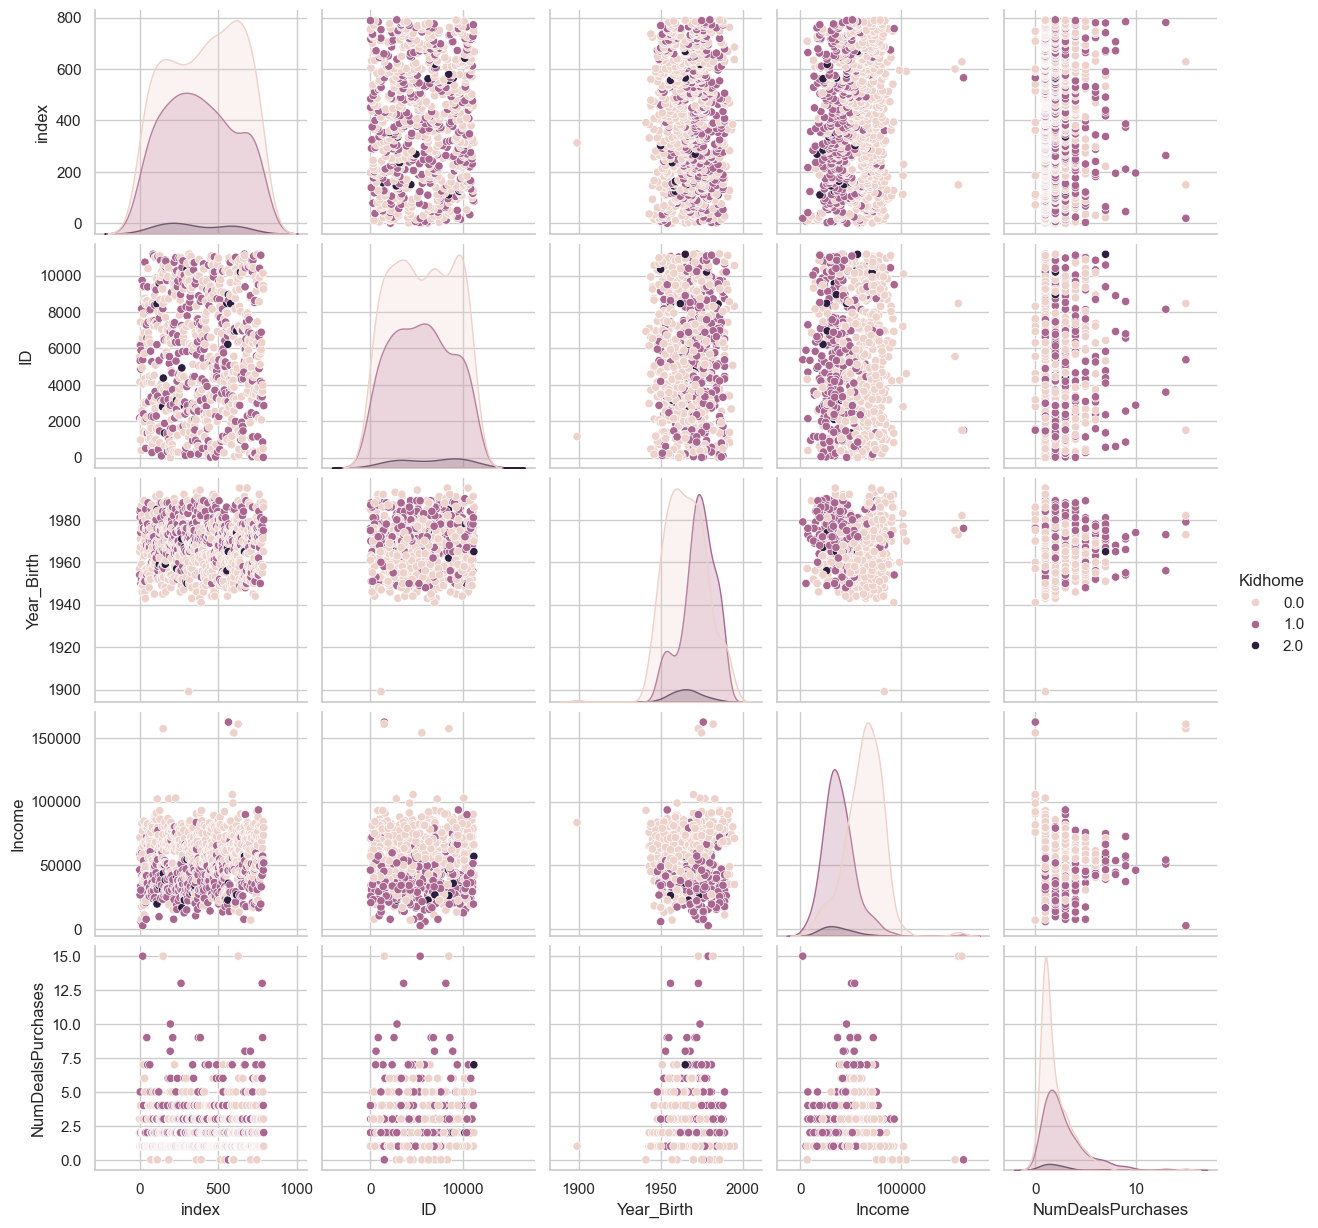

In [91]:
# Выбор числовых признаков для Pair Plot
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'NumDealsPurchases']

# Матрица диаграмм рассеяния (Pair Plot) для всех числовых признаков
sns.pairplot(df[numerical_features], height=2.5)
plt.suptitle('Матрица диаграмм рассеяния между числовыми признаками', y=1.02, fontsize=16, fontweight='bold')
plt.show()

sns.pairplot(df[df.columns], hue='Kidhome')

**Матрица диаграмм рассеяния показывает, есть ли линейные или нелинейные зависимости между парами признаков, например наблюдается четкая обратная зависимость - клиенты с высоким доходом практически всегда не имеют детей. С увеличением количества детей, доход резко снижается.**

### 2.2. Построение гистограмм

**`Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.`**

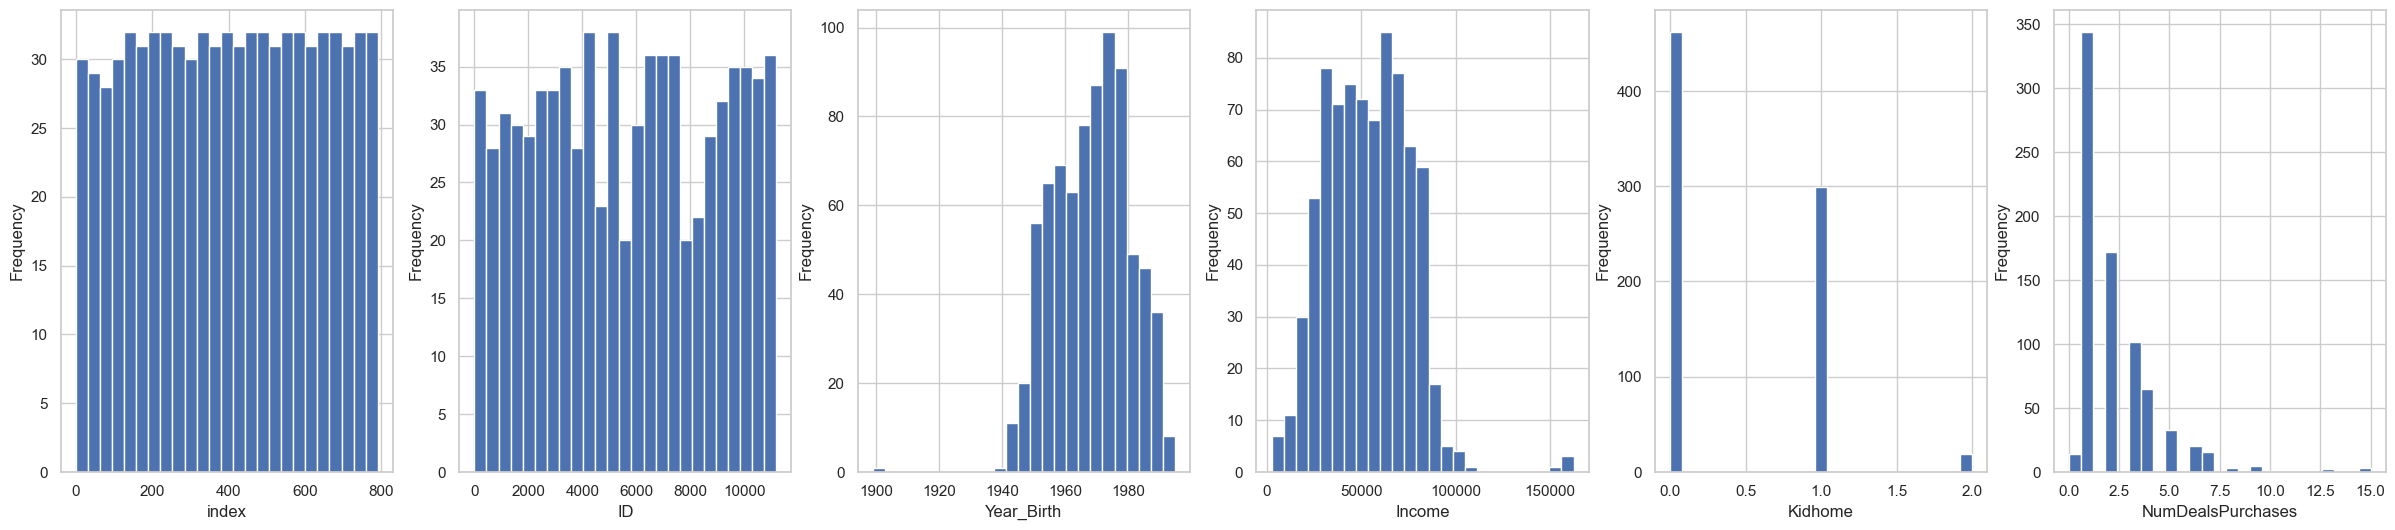

In [108]:
def is_col_int(col):
    return df[col].dtype in ['int64', 'float64']

fig, axes = plt.subplots(
 1, # одна строка
 6, # количесвто графиков
 figsize=(30, 6) # размер графика
)

i = 0
for col in df.columns:  # Пробегаемся по всему списку колонок, ищем числовые и рисуме гистограммы только дял них
    if is_col_int(col):
        df[col].hist(bins=25, ax=axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        i += 1

**В результате получается ряд из шести гистограмм, каждая из которых показывает распределение отдельного числового признака из набора данных. Оптимальным количеством "bins" было выбрано 25. Изучив гистограммы становится ястно, что большинство покупателей совершает 1-2 покупки. Среди клиентов встречаются рождённые в 1900-х годах**

## 2.3. Оценка коэффициента корреляции и ковариации

**`Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.`**

Матрица коэффициентов корреляции:


,index,ID,Year_Birth,Income,Kidhome,NumDealsPurchases,Age
index,1.000000,0.015061,-0.005975,0.048665,-0.060109,0.007570,0.005975
ID,0.015061,1.000000,0.032687,0.051637,-0.000966,-0.037047,-0.032687
Year_Birth,-0.005975,0.032687,1.000000,-0.143890,0.258012,-0.053334,-1.000000
Income,0.048665,0.051637,-0.143890,1.000000,-0.536287,-0.054572,0.143890
Kidhome,-0.060109,-0.000966,0.258012,-0.536287,1.000000,0.183462,-0.258012
NumDealsPurchases,0.007570,-0.037047,-0.053334,-0.054572,0.183462,1.000000,0.053334
Age,0.005975,-0.032687,-1.000000,0.143890,-0.258012,0.053334,1.000000




Матрица ковариации:


,index,ID,Year_Birth,Income,Kidhome,NumDealsPurchases,Age
index,51690.599353,1.123811e+04,-16.321502,2.420221e+05,-7.416061,3.303955,16.321502
ID,11238.109376,1.077084e+07,1288.943368,3.706962e+06,-1.720824,-233.396680,-1288.943368
Year_Birth,-16.321502,1.288943e+03,144.370197,-3.781839e+04,1.682306,-1.230145,-144.370197
Income,242022.122751,3.706962e+06,-37818.386778,4.784848e+08,-6365.870771,-2291.470712,37818.386778
Kidhome,-7.416061,-1.720824e+00,1.682306,-6.365871e+03,0.294478,0.191111,-1.682306
NumDealsPurchases,3.303955,-2.333967e+02,-1.230145,-2.291471e+03,0.191111,3.684900,1.230145
Age,16.321502,-1.288943e+03,-144.370197,3.781839e+04,-1.682306,1.230145,144.370197


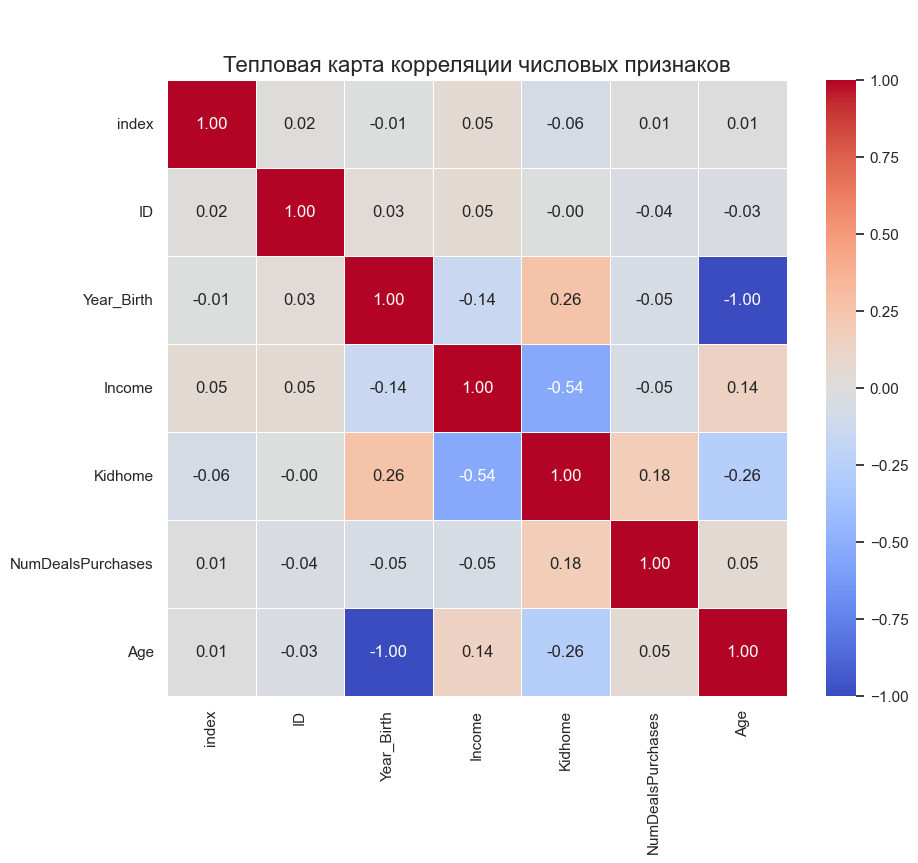

In [153]:
correlation_matrix = df.corr(numeric_only=True)
display("Матрица коэффициентов корреляции:")
display(correlation_matrix)

covariance_matrix = df.cov(numeric_only=True)
display("\n\nМатрица ковариации:")
display(covariance_matrix)

# Построение Тепловой Карты Корреляции

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Численные значения (коэффициенты)
    fmt=".2f",               # Формат вывода чисел (до двух знаков после запятой)
    cmap='coolwarm',         # Цветовая схема: красный (+), синий (-)
    linewidths=.5,           # Линии между ячейками
    cbar=True                # Отобразить цветовую шкалу
)

plt.title('\n\nТепловая карта корреляции числовых признаков', fontsize=16)
plt.show()

Ковариация показывает, как две переменные изменяются вместе и имеют ли они тенденцию двигаться в одном направлении.
Корреляция — это нормализованная версия ковариации, которая помимо направления, также измеряет силу линейной связи между переменными, приводя результат к диапазону от -1 до +1

**По таблице корреляции можно сделать следующие выводы: Доход является наиболее важным признаком, так как он демонстрирует самую сильную обратную зависимость с количеством детей, также при большем количестве детей совершается большее количество покупок.**

---
## 3. Задания
---

### 3.1. Задание 1 - Построение диаграммы по семейному статусу и количеству детей.
---

**`Текст задания: Использовать seaborn. По группировке - количество клиентов по количеству детей и по каждому семейному статусу (marital_status) построить диаграмму.`**

**После выполнения предварительных действий можно было приступать к заданиям. В первом задании требовалось построить диаграмму, отображающую распределение клиентов по их семейному статусу и количеству детей. Данная диаграмма может помочь определить распределение клиентов для более персонализированной рекламы.**

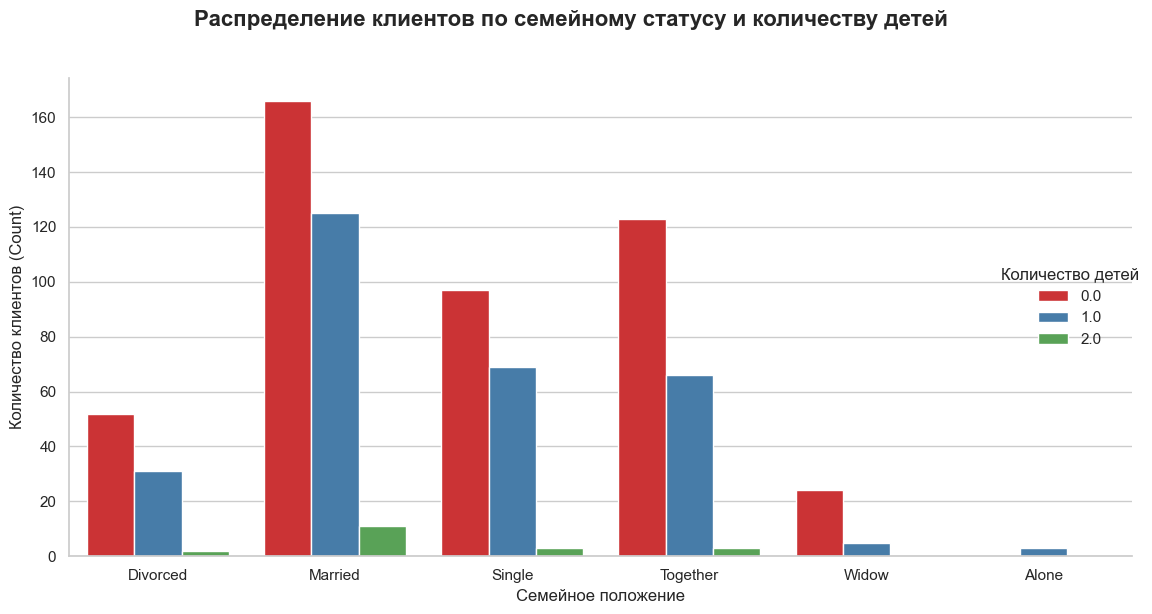

In [133]:
# Группируем по 'Kidhome' и 'Marital_Status' и подсчитываем количество клиентов ('Count').
grouped_df = df.groupby(['Kidhome', 'Marital_Status']).size().reset_index(name='Count')

# Создаем сгруппированную столбчатую диаграмму с помощью sns.catplot
# x - Семейное положение, hue - Количество детей, y - Количество клиентов
g = sns.catplot(
    data=grouped_df,
    kind="bar",
    x="Marital_Status",
    y="Count",
    hue="Kidhome",
    height=6,          # Высота графика
    aspect=1.8,        # Соотношение сторон
    palette="Set1" # Красивая палитра
)

# Настройка заголовков и подписей
g.fig.suptitle('Распределение клиентов по семейному статусу и количеству детей', y=1.02, fontsize=16, fontweight='bold')
g.set_axis_labels("Семейное положение", "Количество клиентов (Count)", fontsize=12)

# Настройка легенды
g._legend.set_title("Количество детей")

# Отображение графика.
plt.tight_layout()
plt.show()

**Изучив график, становится ясно, что большинство детей относятся к женатым и совместно проживающим людям. Это может быть полезно при рекламе клиенту например семейной подписки или же товаров иного вида ориентированных семью.**

---
### 3.2. Задание 2 - Построение графика. Отображение минимального дохода в зависимости от образования.
---

**`Текст задания: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить минимальный доход по образованию. Отобразить маркеры в виде ⬤ красного цвета размером 18.`**

**В данном задании требовалось отобразить зависимость минимального количества дохода от образования на графике. Так как в методичке на примере отображалось среднее количество дохода от образования, что отличалось от названия задания, было принято решение построить два соответствующих графика.**

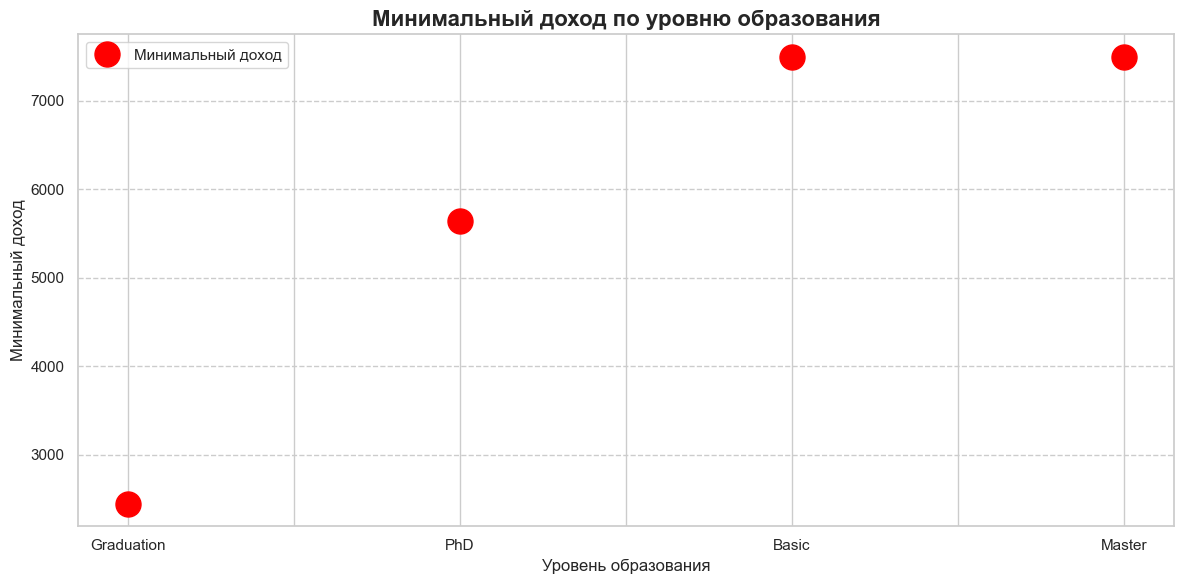

In [75]:
# Рассчитываем минимальное значение дохода ('Income') для каждого уровня образования ('Education').
min_income_by_education = pd.pivot_table(
    df,
    values='Income',
    index='Education',
    aggfunc='min'
).sort_values(by='Income', ascending=True)

plt.figure(figsize=(12, 6)) # Создаем новую область для графика определённого размера, для того чтобы подогнать под ширину экрана

min_income_by_education.plot(
    kind='line',
    ax=plt.gca(), # Рисуем на текущих осях
    marker='o',   # Маркер в виде круга
    markersize=18, # Размер маркера
    color='red',  # Цвет линии и маркеров
    linewidth=0   # Толщина линии
)

# Настройка заголовков и подписей для нового графика
plt.title('Минимальный доход по уровню образования', fontsize=16, fontweight='bold')
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Минимальный доход', fontsize=12)

plt.legend(['Минимальный доход'], loc='best')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

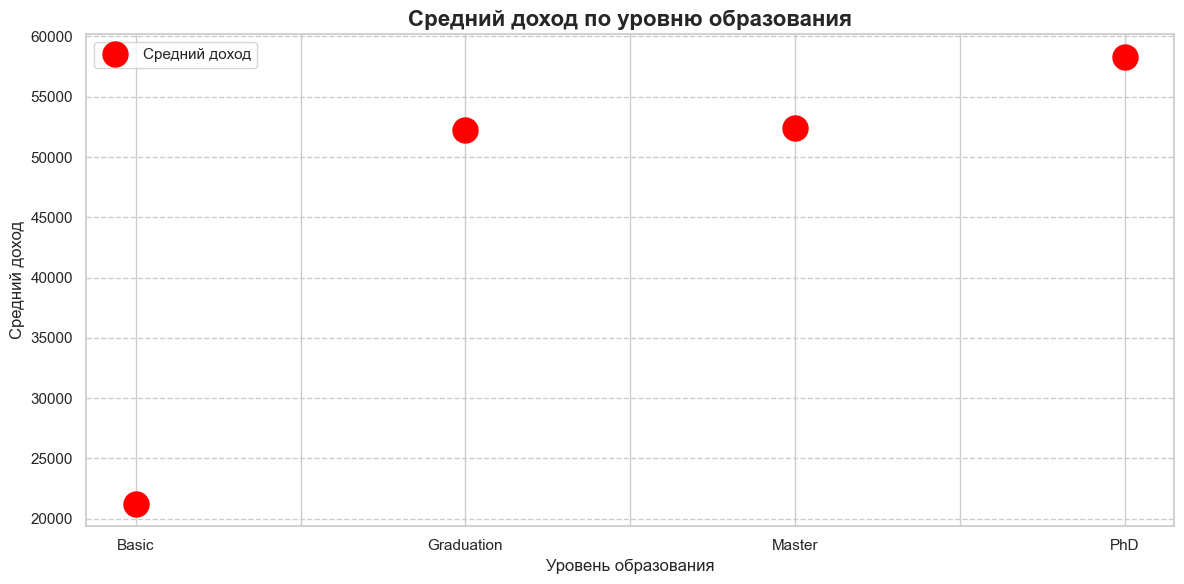

In [76]:
# Рассчитываем среднее значение дохода ('Income') для каждого уровня образования ('Education').
min_income_by_education = pd.pivot_table(
    df,
    values='Income',
    index='Education',
    aggfunc='mean'
).sort_values(by='Income', ascending=True)

plt.figure(figsize=(12, 6)) # Создаем новую область для графика определённого размера, для того чтобы подогнать под ширину экрана

min_income_by_education.plot(
    kind='line',
    ax=plt.gca(), # Рисуем на текущих осях
    marker='o',   # Маркер в виде круга
    markersize=18, # Размер маркера
    color='red',  # Цвет линии и маркеров
    linewidth=0   # Толщина линии
)

# Настройка заголовков и подписей для нового графика
plt.title('Средний доход по уровню образования', fontsize=16, fontweight='bold')
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Средний доход', fontsize=12)

plt.legend(['Средний доход'], loc='best')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Изучив графики среднего и минимального дохода от образования, становится ясно, что в среднем люди с высшим образованием зарабатывают в разы больше чем люди без образования, но обратив внимание на минимальный доход заметно, что высшее образование не является гарантом высокого заработка, лишь помогает его достичь.**  

---
### 3.3. Задание 3 - Построение круговой диаграммы.
---

**`Текст задания: Использовать matplotlib. Отфильтровать клиентов по year_birth больше 1980. Построить круговую диаграмму, которая отображает процент клиентов каждого семейного положения.`**

**В данном задании требовалось составить круговую диаграмму, которая отобразила бы процент клиентов с различным семейным положением. Это необходимо для составления стратегии компании, чтобы ориентироваться на целевую аудиторию.** 

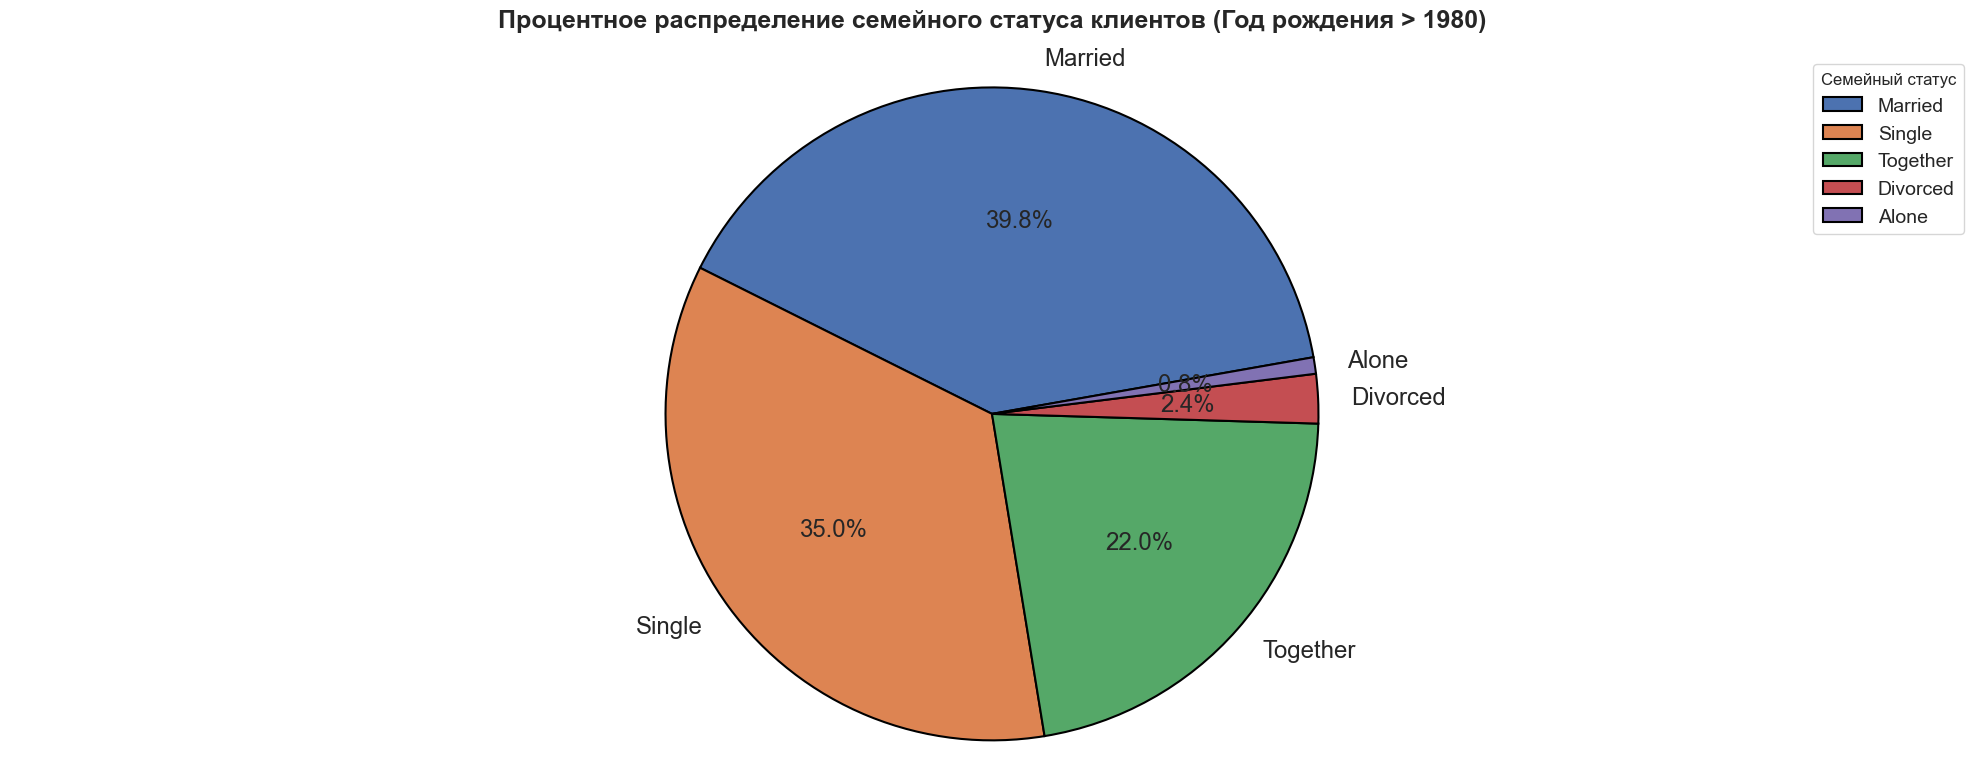

In [77]:
filtered_df = df[df['Year_Birth'] > 1980].copy()

# Используем value_counts() для получения количества клиентов в каждой категории.
marital_status_counts = filtered_df['Marital_Status'].value_counts()

plt.figure(figsize=(20, 8)) # Создаем новую область для графика определённого размера, для того чтобы подогнать под ширину экрана

# Построение круговой диаграммы
plt.pie(
    marital_status_counts,
    labels=marital_status_counts.index, # Подписи секторов - Семейный статус
    autopct='%1.1f%%',                  # Формат отображения процентов
    startangle=10,                      # Поворот графика для того, чтобы рассмотреть доли "Alone" и "Divorced"
    textprops={'size': 'x-large'},      # Увеличение размера шрифта текста
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5} # Добавляем обводку секторов
)

# Добавление заголовка
plt.title('Процентное распределение семейного статуса клиентов (Год рождения > 1980)', fontsize=18, fontweight='bold', pad=20)

# Добавление легенды
plt.legend(
    marital_status_counts.index, 
    title="Семейный статус", 
    loc="best", 
    fontsize=14, 
    bbox_to_anchor=(1, 1)
)

# Обеспечение, что круг имеет круглую форму
plt.axis('equal') 
plt.tight_layout()
plt.show()

**Изучив полученную диаграмму можно заметить, что самая большая доля клиентов находятся в отношениях (женаты или встречаются). Примерно треть всех клиентов не находятся в отношениях. Данная информация может быть крайне полезной при составлении маркетинговой стратегии.**

---
## 4. Построение дополнительных графиков
---

### 4.1. Выполнение графика типа hexagonal binning plot

**`Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.`**

<Axes: xlabel='Income', ylabel='Year_Birth'>

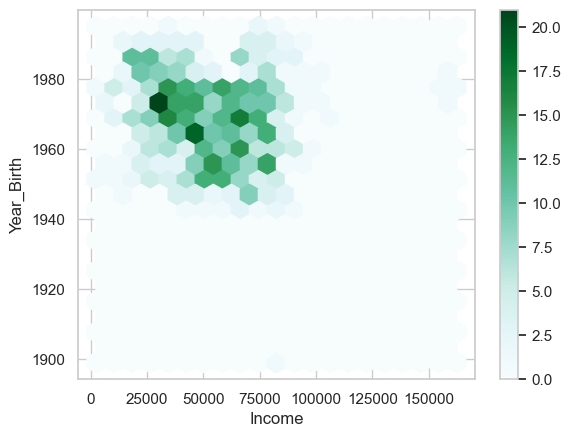

In [114]:
df.plot(x='Income', y='Year_Birth', kind='hexbin', gridsize=20, sharex=False, grid=True)

**Вывод: График Hexbin показывает, как плотность клиентов распределена между доходом и датой рождения. Наибольший доход соответствует людям среднего возраста.**

### 4.2. Выполнение графика типа boxplot

**`Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.`**

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5e8bbf390>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5e8bbf610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5e8bbf250>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5e8bbf890>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5e8bbf9d0>],
 'means': []}

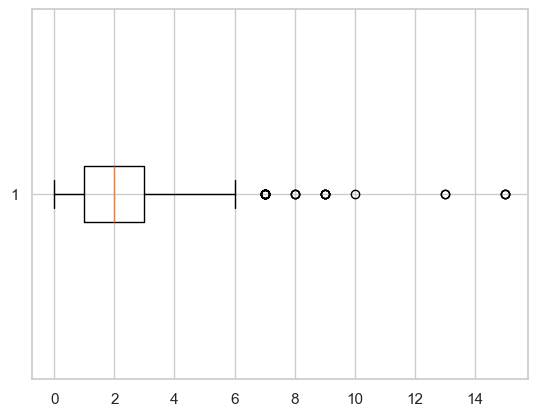

In [116]:
plt.boxplot(df['NumDealsPurchases'], vert=False)

**Вывод: график типа boxplot позволяет оценить пять ключевых показателей.
Медиана: Жирная вертикальная линия внутри ящика. Она находится примерно на отметке 2. Это означает, что 50% клиентов совершили 2 покупки по скидкам (или меньше), а 50% - больше.
Первый квартиль: Левый край ящика. Находится на отметке 1 - 25% клиентов совершили 1 покупку по скидкам или меньше.
Третий квартиль: Правый край ящика. Находится примерно на отметке 4 75% клиентов совершили 4 покупки по скидкам или меньше.
Усы: Линии, простирающиеся от ящика. Они доходят до границы нормального распределения. Правый ус заканчивается примерно на отметке 6.
Точки-выбросы: Отдельные точки значительно отличающиеся, расположенные за пределами усов. На графике есть несколько точек-выбросов, расположенных далеко справа (например, 10, 13).**

### 4.3. Построение boxplot с добавление категории по столбцу зарплаты.

**`Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).`**

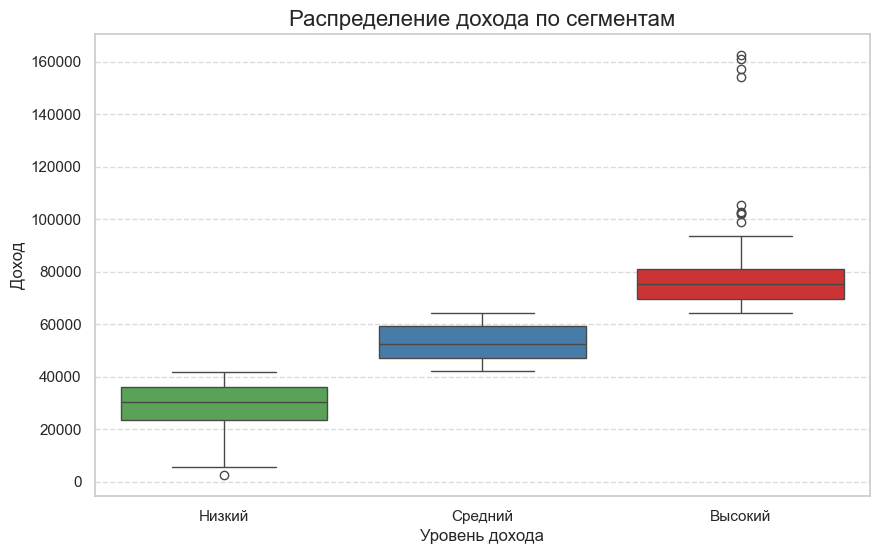

In [139]:
df['Income_Level'] = pd.qcut(df['Income'], q=3, labels=['Низкий', 'Средний', 'Высокий'], duplicates='drop')
# Построение Box Plot для визуализации распределения дохода в каждой категории
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Income_Level',
    y='Income',
    data=df,
    hue='Income_Level', 
    palette=['#4daf4a', '#377eb8', '#e41a1c'], # Цвета для Low, Medium, High
    order=['Низкий', 'Средний', 'Высокий'] # Гарантируем правильный порядок осей
)

# Добавляем заголовки и подписи
plt.title('Распределение дохода по сегментам', fontsize=16)
plt.xlabel('Уровень дохода', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

**Вывод: данный график показывает распределение дохода внутри категорий. Можно заметить, что в категории низкий есть выделяющиеся значение (очень низкого дохода), а также в высоком доходе, есть несколько человек имеющих очень высокий доход даже для своей категории.**

### 4.4. Выполнение графиков boxplot по категориям.

Было решено создать графики количества детей от возраста, а также дохода от уровня образования.

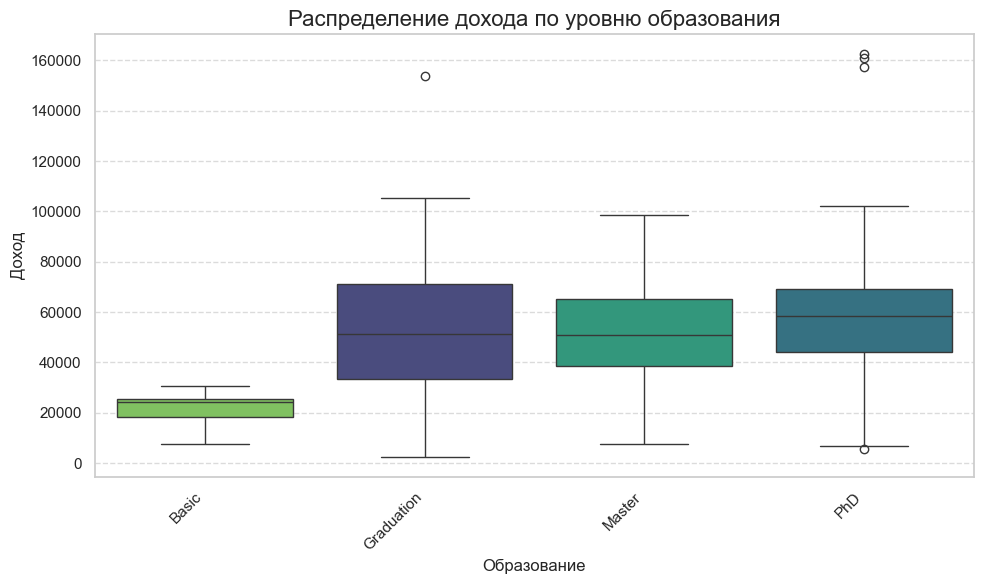

In [145]:
plt.figure(figsize=(10, 6))
plot_df = df.dropna(subset=['Education', 'Income'])

sns.boxplot(
    x='Education',
    y='Income',
    data=plot_df,
    hue='Education',
    palette='viridis',
    order=['Basic', 'Graduation', 'Master', 'PhD']
)

plt.title('Распределение дохода по уровню образования', fontsize=16)
plt.xlabel('Образование', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.xticks(rotation=45, ha='right') # Поворот меток для лучшей читаемости
plt.tight_layout() # Обеспечивает, что метки не обрезаются
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

**На графике распределения дохода от образования можно заметить, что отсутствие высшего образования крайне негативно сказывается на доходах, однако уровень высшего образования не сильно влияет на доход.**

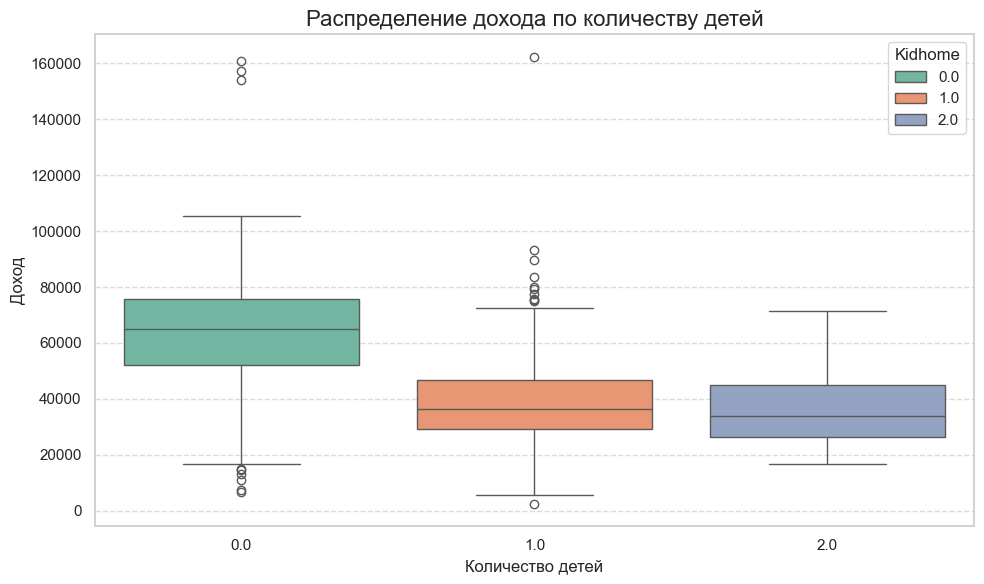

In [151]:
plt.figure(figsize=(10, 6))
# Seaborn автоматически группирует данные по 'Kidhome'
sns.boxplot(
    x='Kidhome',
    y='Income',
    data=df,
    hue='Kidhome',
    palette='Set2',
    order=sorted(df['Kidhome'].unique()), # Гарантируем правильный порядок осей
)

plt.title('Распределение дохода по количеству детей', fontsize=16)
plt.xlabel('Количество детей', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**На графике распределения количества детей от уровня дохода можно заметить, что люди без детей в среднем зарабатывают больше, чем те, у кого они есть.**

---
## Вывод
---

**В ходе выполнения лабораторной работы был проведен комплексный анализ данных о клиентах магазина, направленный на изучение взаимосвязей между различными признаками, а также на визуализацию этих зависимостей с использованием современных инструментов анализа данных. Работа позволила не только закрепить теоретические знания, но и приобрести практические навыки, необходимые для дальнейшей профессиональной деятельности в области анализа данных.
Использование библиотек «seaborn» и «pandas» позволило эффективно визуализировать данные, что является ключевым этапом в процессе анализа. Визуализация помогает не только упростить восприятие сложных данных, но и выявить скрытые закономерности, которые могут быть неочевидны при работе с табличными данными. Например, точечные диаграммы и матрицы рассеяния позволили быстро оценить наличие линейных и нелинейных зависимостей между признаками, а тепловая карта корреляции наглядно продемонстрировала силу и направление этих связей.
Одним из важных этапов работы стала предварительная обработка данных, включающая удаление дубликатов и обработку пропущенных значений. Это подчеркивает важность качества данных для последующего анализа: даже самые совершенные алгоритмы визуализации и статистики могут дать некорректные результаты, если исходные данные содержат ошибки или противоречия. В частности, устранение неявных дубликатов в столбце с семейным положением клиентов позволило избежать искажений при построении диаграмм и расчете статистик.
Анализ распределения клиентов по семейному положению и количеству детей показал, что наибольшая доля клиентов с детьми приходится в отношениях. Это важное наблюдение для маркетинговых стратегий, так как позволяет целенаправленно предлагать таким клиентам товары и услуги, ориентированные на семейное потребление. Например, рекламные кампании, акцентирующие внимание на семейных ценностях или выгодах для больших семей, могут оказаться наиболее эффективными для данной аудитории.
Исследование зависимости дохода от уровня образования выявило, что высшее образование, хотя и не является гарантией высокого дохода, значительно увеличивает его потенциал. При этом минимальный доход среди людей с высшим образованием может быть достаточно низким, что указывает на наличие других факторов, влияющих на финансовое положение, таких как опыт работы, регион проживания или профессиональная сфера. Этот вывод может быть полезен для разработки программ лояльности и сегментации клиентов по уровню платежеспособности.
Круговая диаграмма, отображающая распределение клиентов по семейному положению, подтвердила, что большая часть аудитории состоит из людей, находящихся в отношениях. Это позволяет компании адаптировать свои продукты и коммуникации под потребности данной группы, например, предлагая совместные подписки или скидки для пар.
Использование дополнительных методов визуализации, таких как hexagonal binning plot и boxplot, позволило углубить анализ. Hexagonal binning plot наглядно показал плотность распределения клиентов по возрасту и доходу, выявив, что наиболее высокая концентрация клиентов с высоким доходом наблюдается в средней возрастной группе. Это может быть связано с тем, что люди в этом возрасте достигают пика своей карьеры и имеют стабильный источник дохода.
Графики типа boxplot оказались особенно полезными для выявления выбросов и анализа распределения данных внутри категорий. Например, анализ распределения количества покупок показал, что большинство клиентов совершают от 1 до 4 покупок, в то время как небольшое количество клиентов значительно превышает этот показатель. Такие клиенты могут представлять особый интерес для компании, так как они являются наиболее лояльными и активными потребителями.
Изучение ковариации и корреляции позволило количественно оценить связи между признаками. Корреляция между доходом и количеством детей оказалась отрицательной, что может указывать на то, что семьи с детьми часто сталкиваются с дополнительными расходами, что снижает их средний доход. Это важный аспект для разработки финансовых продуктов или услуг, ориентированных на семьи. 
В целом, выполнение лабораторной работы позволило не только освоить технические аспекты работы с данными, но и развить аналитическое мышление. Умение интерпретировать визуализации и делать на их основе выводы является ключевым навыком для аналитика данных. Полученные результаты могут быть использованы для оптимизации бизнес-процессов, повышения эффективности маркетинговых кампаний и улучшения клиентского опыта.**